# Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# Read Preprocessing Results

In [ ]:
# Upload files
uploaded = files.upload()

Saving dataset_multihot3 (48 parts).csv to dataset_multihot3 (48 parts).csv
Saving dataset_multihot2 (24 parts).csv to dataset_multihot2 (24 parts).csv
Saving dataset_multihot1 (12 parts).csv to dataset_multihot1 (12 parts).csv


In [ ]:
df_multihot1 = pd.read_csv('dataset_multihot1 (12 parts).csv', index_col=0)
df_multihot2 = pd.read_csv('dataset_multihot2 (24 parts).csv', index_col=0)
df_multihot3 = pd.read_csv('dataset_multihot3 (48 parts).csv', index_col=0)
df_multihot1

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,0,1,1,0,1,1,1,1,1
1,0,1,1,0,1,1,1,1,1,0,1,1
2,0,0,1,1,1,1,1,1,1,0,1,1
3,0,1,0,1,1,1,0,1,1,0,1,1
4,0,1,0,1,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,1,1,1,1,1,1,1,1,1,1
608,1,1,1,1,1,1,1,1,1,1,1,1
609,1,1,1,1,1,1,1,1,1,1,1,1
610,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_multihot2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1
1,0,0,1,0,0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1
3,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
608,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
609,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
610,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_multihot3

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0
608,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0
609,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0
610,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0


# Data Spliting (Train and Test)

### Spliting for Machine Learning analysis

### Spliting for Time series analysis

In [ ]:
# Spliting dataset
def split_dataset(df, train_size=0.7):
  n_split = int(np.floor(len(df) * train_size))
  train = df[:n_split]
  test = df[n_split:]
  # Set train, test to float32
  train = train.astype(np.float32)
  test = test.astype(np.float32)
  return train, test

# Creating sequences
def create_sequences(series, n_look_back_window=1):
  seq_X, seq_Y = [], []
  n_range = len(series) - n_look_back_window - 1
  for i in range(0, n_range):
    x = series[i: (i + n_look_back_window)]
    y = series[i + n_look_back_window]
    seq_X.append(x)
    seq_Y.append(y)
  return np.array(seq_X), np.array(seq_Y)

# Create sequences reshape
# [samples, n_look_back_window, features]
def sequences_reshape(train, test, n_look_back_window):
  # Convert into input/output
  x_train, y_train = create_sequences(train.values, n_look_back_window)
  x_test, y_test = create_sequences(test.values, n_look_back_window)
  return x_train, x_test, y_train, y_test

In [ ]:
N_LOOK_BACK_WINDOW = 12
TRAIN_SIZE = 0.7

train, test = split_dataset(df_multihot1, TRAIN_SIZE)
x_train, x_test, y_train, y_test = sequences_reshape(train, test, N_LOOK_BACK_WINDOW)

print(train.shape, test.shape)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(428, 12) (184, 12)
(415, 12, 12) (171, 12, 12) (415, 12) (171, 12)


# Build Models

## LSTM (baseline)

In [ ]:
# LSTM
def lstm(n_input, n_features, optimizer, loss, metrics):
  model = Sequential()
  model.add(LSTM(128, input_shape=(n_input, n_features)))
  model.add(Dropout(0.2))
  model.add(Dense(256))
  model.add(Dense(64))
  model.add(Dense(n_features))
  model.add(Activation('softmax'))
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  model.summary()
  return model

# Training Models

In [ ]:
# Set callbacks
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.25, patience=5, min_lr=0.000001, verbose=1)
]

In [ ]:
def softmax(X):
  exps = tf.keras.backend.exp(X)
  return exps / tf.keras.backend.sum(exps, keepdims=True)

def cross_entropy(X, y):
  m = y.shape[0]
  p = softmax(X)
  log_likelihood = -tf.keras.backend.log(p[range(m),y])
  loss = tf.keras.backend.sum(log_likelihood) / m
  return loss
  # return (-1) * tf.keras.backend.sum(y_actual * tf.keras.backend.log(y_pred))

def cross_entropy1(y_true, y_hat):
  return tf.nn.softmax_cross_entropy_with_logits(y_hat, y_true)

In [ ]:
 def cross_entropy():
  targets = tf.add(self.inputs['cluster_id'], self.config.add)
  return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(self.layers['logits'], targets))

## LSTM (baseline)

In [ ]:
clear_session()
np.random.seed(42)
tf.random.set_seed(42)

N_FEATURES = x_train.shape[2]
LR = 0.01
BATCH_SIZE = 64
EPOCHS = 100
OPTIMIZER = optimizers.RMSprop(learning_rate=LR)
LOSS = cross_entropy
METRICS = ['accuracy']

# Define model
lstm_model = lstm(N_LOOK_BACK_WINDOW, N_FEATURES, OPTIMIZER, LOSS, METRICS)

# Run training
lstm_history = lstm_model.fit(x_train, y_train, 
                              validation_data=(x_test, y_test), 
                              batch_size=BATCH_SIZE, 
                              epochs=EPOCHS,
                              callbacks=callbacks,
                              verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               72192     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                780       
_________________________________________________________________
activation (Activation)      (None, 12)                0         
Total params: 122,444
Trainable params: 122,444
Non-trainable params: 0
__________________________________________________

TypeError: ignored

In [ ]:
# Plot history
def plot_history(history, metric):
  
  # Get loss and accuracy
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  m = history.history[metric]
  val_m = history.history['val_' + metric]

  # Show graph loss dan accuracy
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(loss, label='Training set')
  plt.plot(val_loss, label='Validation set', linestyle='--')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.subplot(1, 2, 2)
  plt.title(str.upper(metric))
  plt.xlabel('Epoch')
  plt.ylabel(str.upper(metric))
  plt.plot(m, label='Training set')
  plt.plot(val_m, label='Validation set', linestyle='--')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.show()

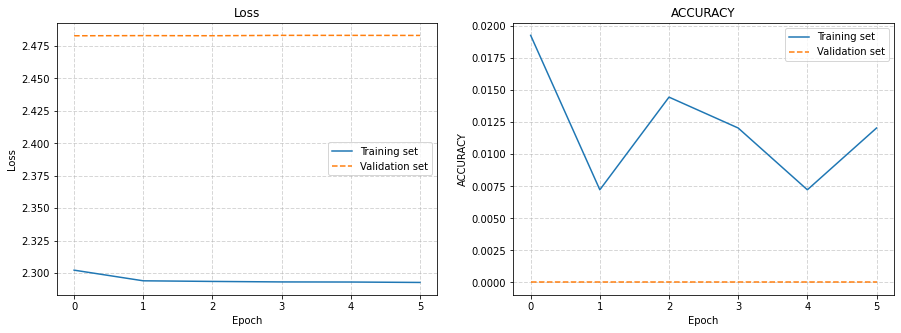

In [ ]:
plot_history(lstm_history, 'accuracy')

# Predictions and Evaluation

In [ ]:
# Evaluate the output
loss, accuracy = lstm_model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: nan - accuracy: 1.0000


In [ ]:
# Predict
predict_result = lstm_model.predict(x_test)
print(predict_result)

# Change to 0 and 1
predict_result[predict_result >= 0.5] = 1
predict_result[predict_result < 0.5] = 0

# Print result
print(predict_result)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [ ]:
# Print out the performance
print ('System performance:')
print ('Test loss : ' + str(loss))
print ('Test accuracy : ' + str(accuracy))

# MSE
prediction = lstm_model.predict(x_test)
mse = np.mean(np.square(prediction - y_test), axis=1)
score = np.mean(mse)
print('Test MSE : ' + str(score))

System performance:
Test loss : 0.36592572927474976
Test accuracy : 0.4736842215061188
Test MSE : 0.36592573


# 새 섹션

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
# TP, TN, FP, FN
print(perf_measure(y_test, prediction))

ValueError: ignored